**Bank Churn Prediction**

**Summary:**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

 

**Data Discription:**
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

 

**Domain:**
Banking

 

**Attribute Information:**
<ul>
<li>RowNumber: Row number.</li>
<li>CustomerId: Unique identification key for different customers.</li>
<li>Surname: Surname of the customer</li>
<li>Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.</li>
<li>Geography: The country to which the customer belongs.</li>
<li>Gender: The gender of the customer.</li>
<li>Age: Age of the customer.</li>
<li>Tenure: The period of time a customer has been associated with the bank.</li>
<li>Balance: The account balance (the amount of money deposited in the bank account) of the customer.</li>
<li>NumOfProducts: How many accounts, bank account affiliated products the person has.</li>
<li>HasCrCard: Does the customer have a credit card through the bank?</li>
<li>IsActiveMember: Subjective, but for the concept</li>
<li>EstimatedSalary: Estimated salary of the customer.</li>
<li>Exited: Did they leave the bank after all?</li>
</ul>
 

**Objective:**
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


**Rubric:**
<ul>
<li>Feature Elimination: 5pts</li>
<li>Bivariate: 5pts</li>
<li>Data Split: 5pts</li>
<li>Normalization: 10pts</li>
<li>Modeling: 20pts</li>
<li>Prediction at 0.5 Threshold: 10 pts</li>
<li>Model Evaluation: 5pts</li>
</ul>

Brandon Smith
1-15-2021

**Import Needed Packages**


In [1]:
# Import needed packages
import tensorflow as tf
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import seaborn
import seaborn as sns
# Import motplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

from sklearn.preprocessing import binarize

from google.colab import drive
drive.mount('/content/drive')
print(tf.__version__)

Mounted at /content/drive
2.4.0


**Import Data from CSV**

In [2]:
# import data 
bank_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')
bank_data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Basic Data Checks**

In [3]:
# get information of the bank data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Get description of the bank data
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
bank_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
pd.DataFrame(bank_data.NumOfProducts.isnull())

,NumOfProducts
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [7]:
# check for duplicate customers in the data
duplicateCustomerId_data = bank_data[bank_data.duplicated(['CustomerId'])]
duplicateCustomerId_data.head(20)
# Apprears to have no duplicates in the data for customer id

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


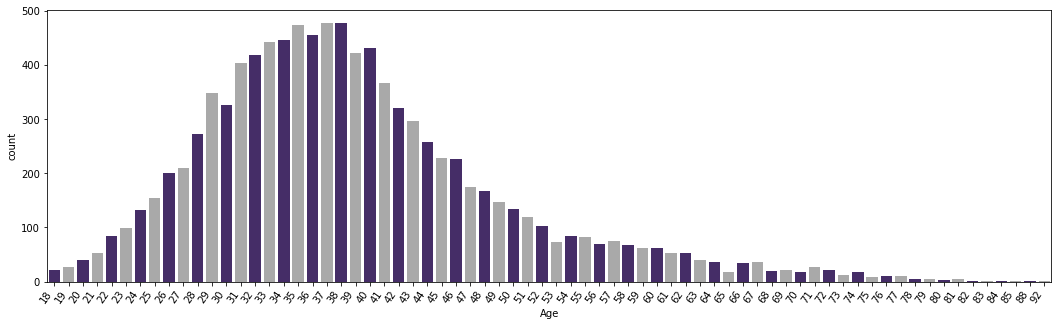

In [8]:
# Univariate plot to look at Age due to being highly skewed
plt.figure(figsize=(18,5));
chart = sns.countplot(bank_data['Age'], palette=['#432371',"#A9A9A9"]);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

# There is a huge tail on age and highly skewed but no real 'outliers' that I can consider removal of due to being a natural progression to that high limit

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


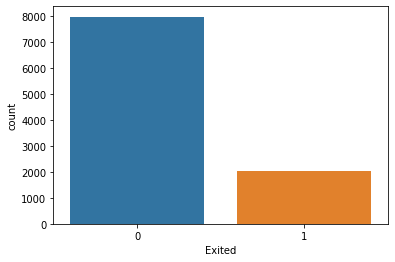

In [9]:
# use this to get a high level view of the number of people in the data set that have exited. So we have around 20% of the dataset that have exited
sns.countplot(bank_data['Exited']);

**Drop Desired Columns**

In [10]:
# drop the id column as it is an identity column and doesn't provide anything to ML algorithm
bank_data = bank_data.drop("CustomerId", axis = 1)
bank_data.head(25)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
# drop the surname column as it is similar to an identity column and doesn't provide anything to ML algorithm
bank_data = bank_data.drop("Surname", axis = 1)
bank_data.head(25)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
# drop the row number column as it is similar to an identity column and doesn't provide anything to ML algorithm
bank_data = bank_data.drop("RowNumber", axis = 1)
bank_data.head(25)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
# find out the number of unique values in the geography column that we will need to handle
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
# confirm that there are only the two genders listed in the gender column
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
# use the one hot encoding for the two object columns based on the two unique checks above (gender & geography)
bank_data=pd.get_dummies(bank_data)
bank_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


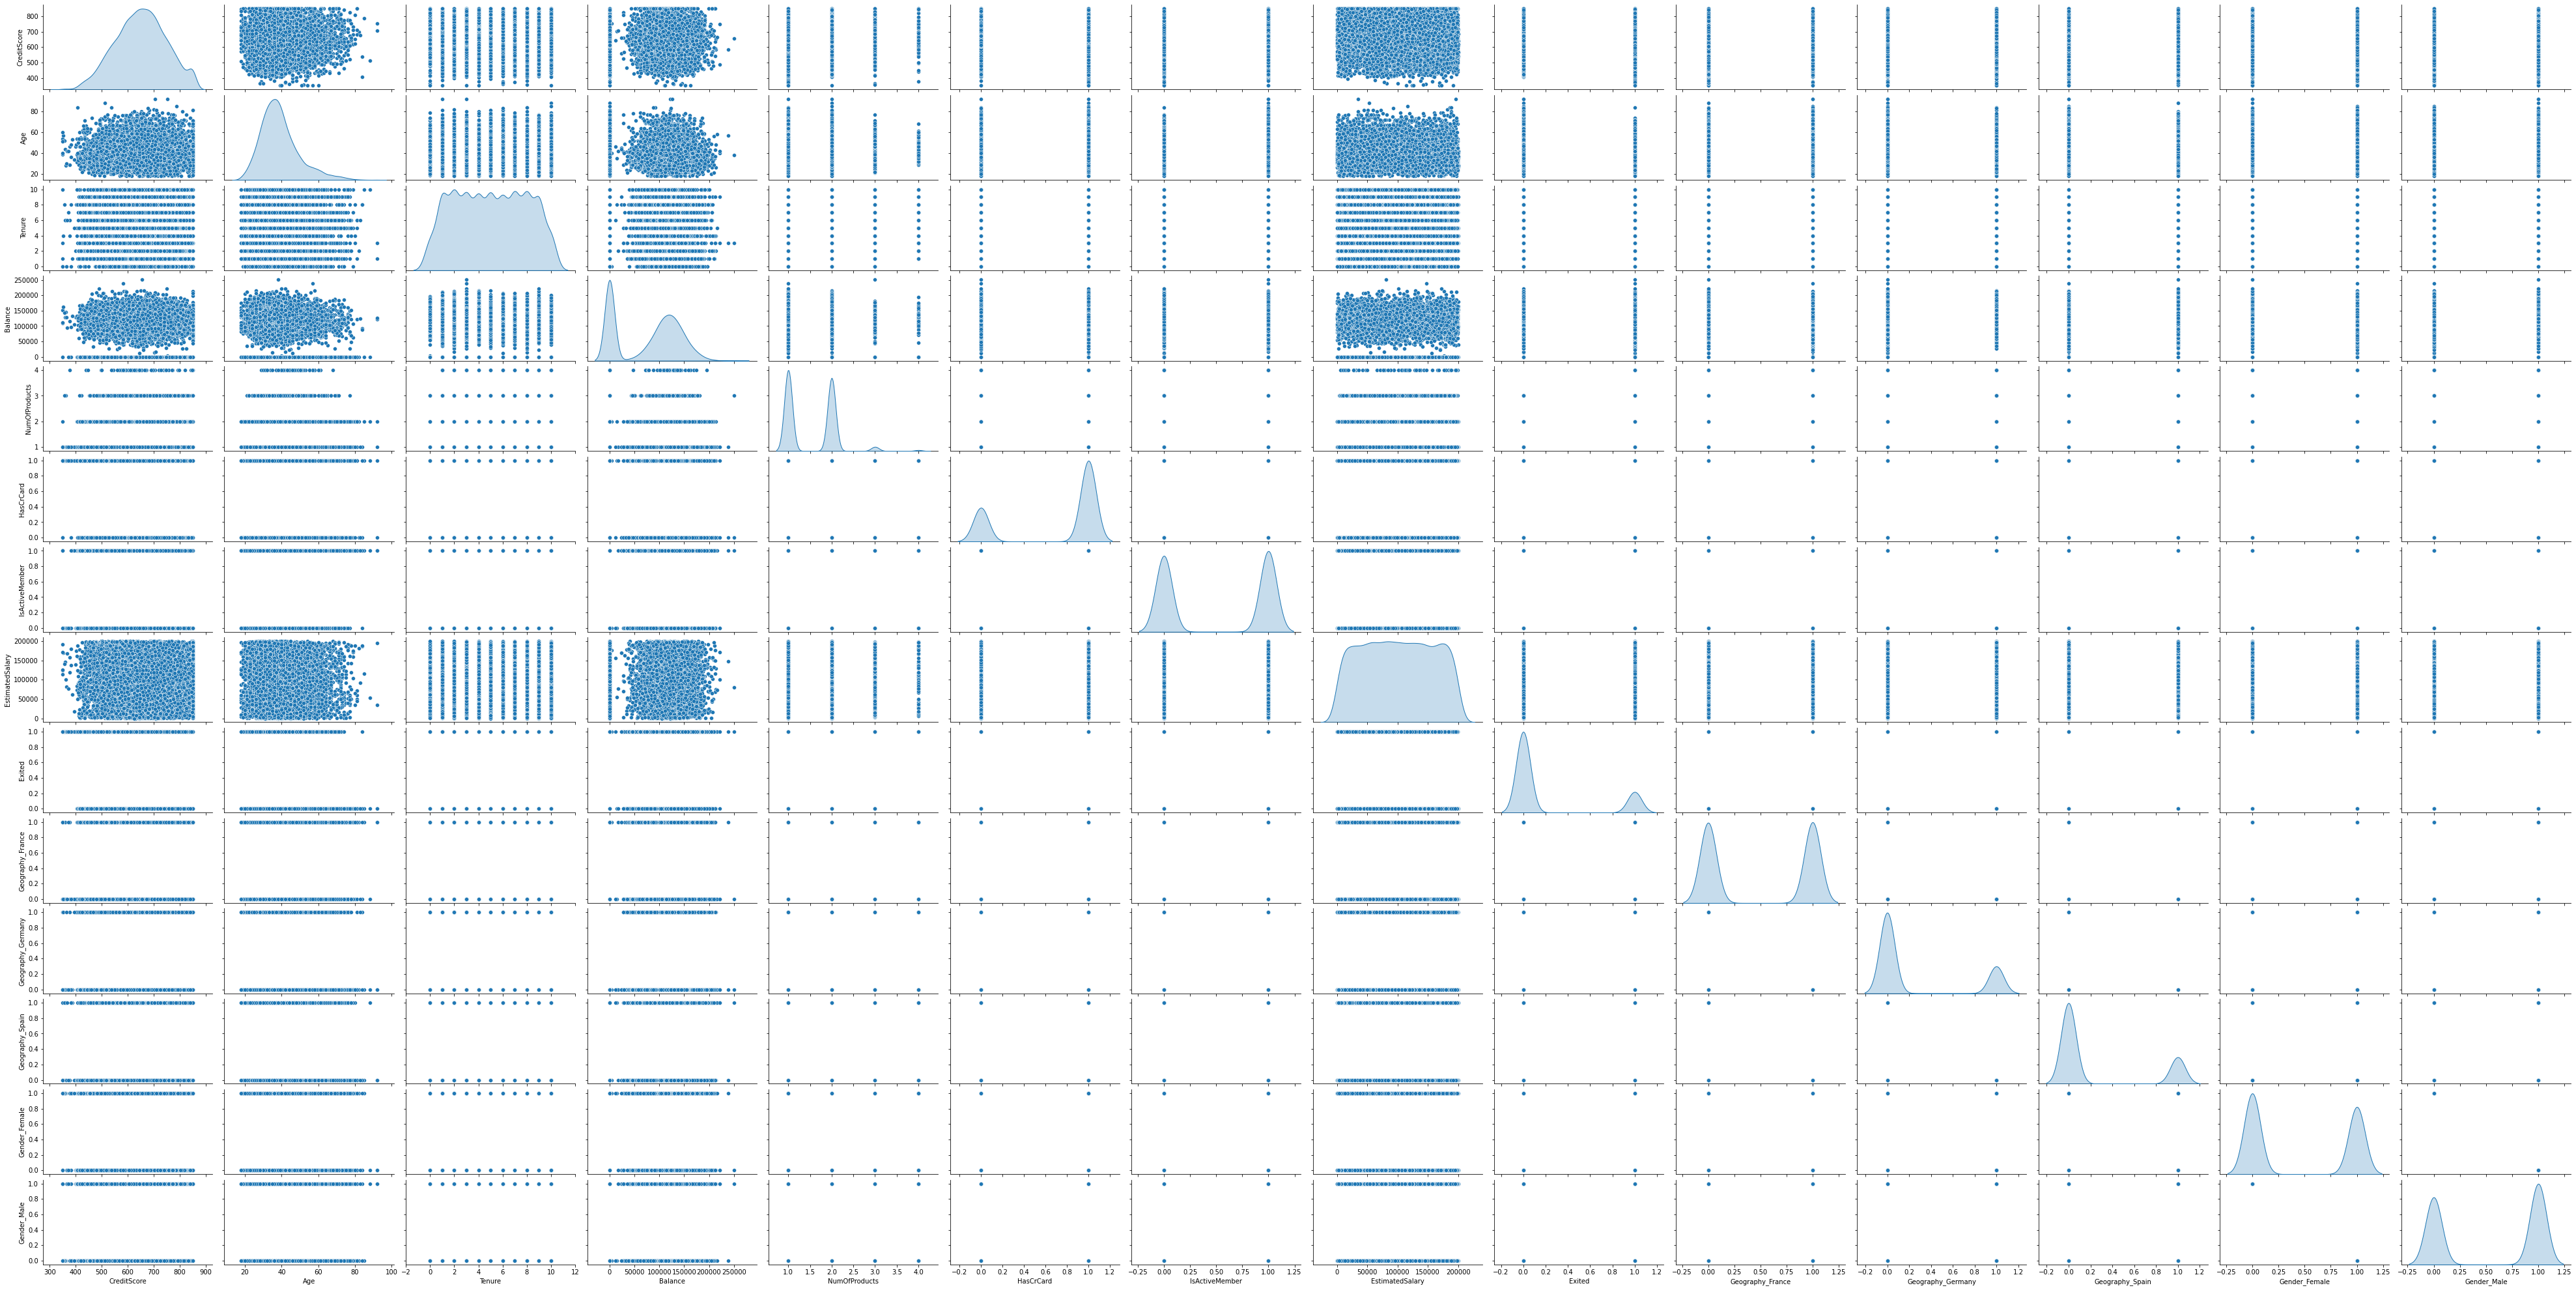

In [16]:
#bank data pairplot
sns.pairplot(bank_data, height=2,aspect=2 , diag_kind='kde')
plt.show();

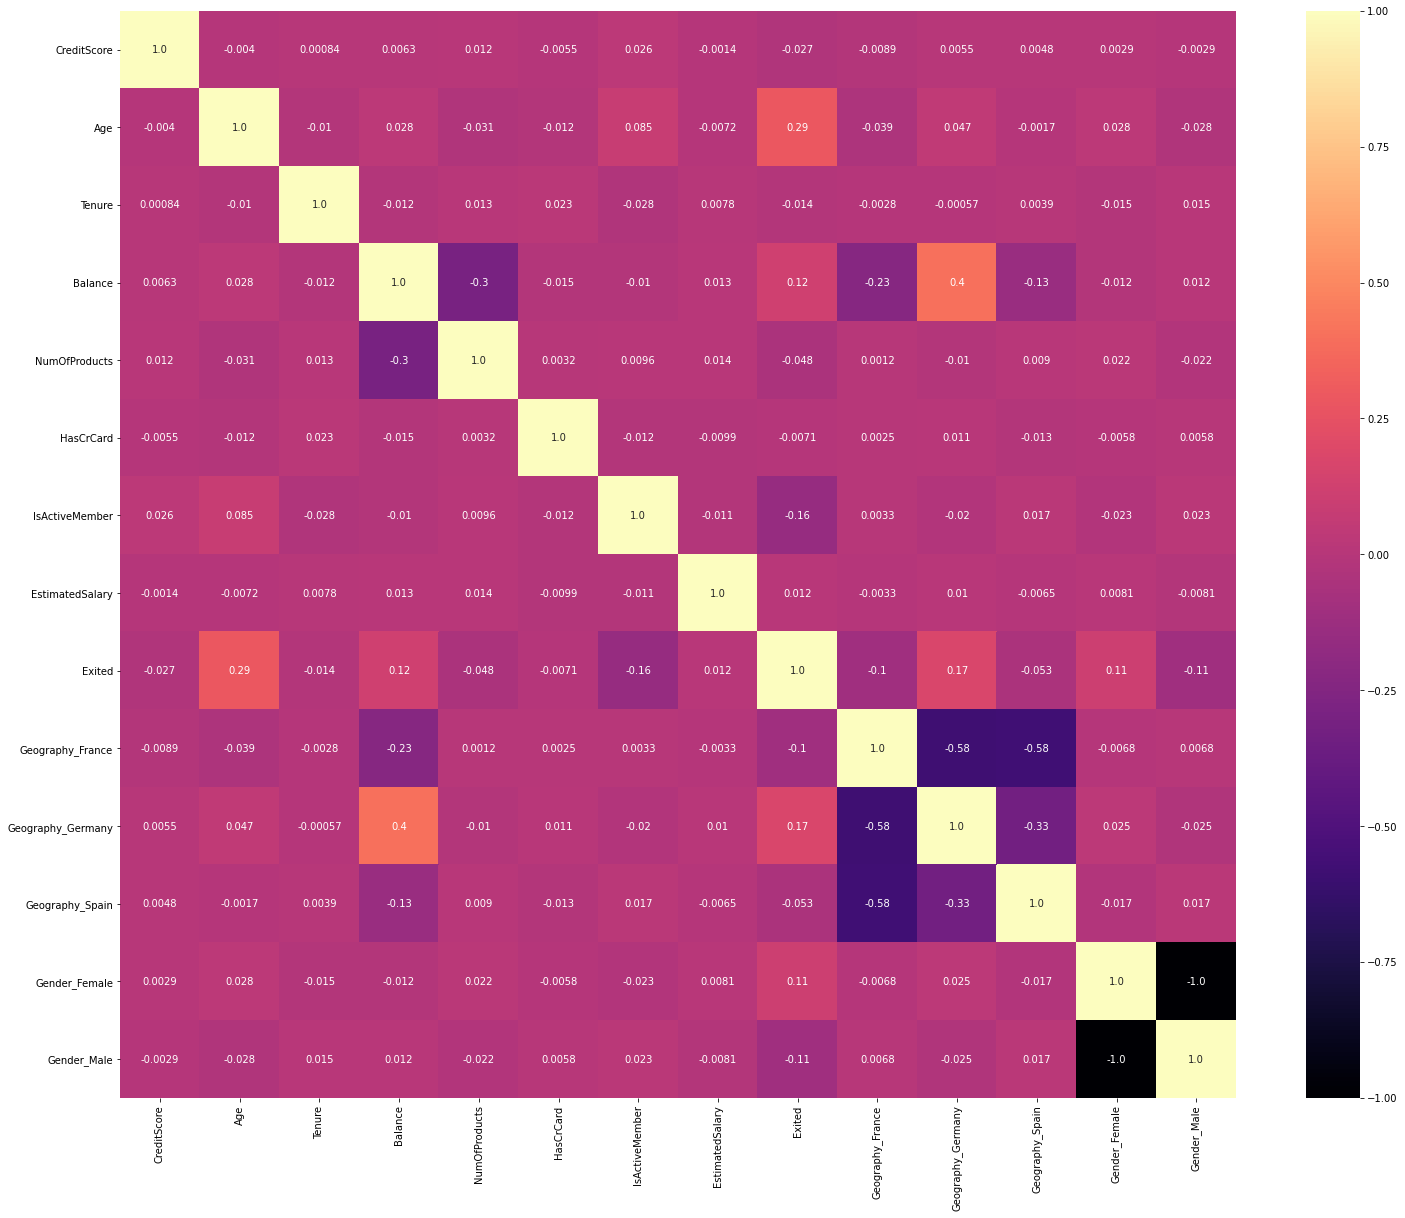

In [17]:
# bank data heat map
plt.figure(figsize=(25,20))
sns.heatmap(bank_data.corr(),annot=True,fmt=".2",cmap='magma')
plt.show()

# analysis- i originally did this prior to the one hot encoding but decided to reun it after the one hot encoding. That offered more insight into the 
# female gender and/or Germany having a higher correlation with exited than males along with the countries france and spain

In [18]:
# Assign the x & y
X = bank_data.drop("Exited" , axis=1)
y = bank_data['Exited']

In [19]:
# Confirm what is included in x
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Confirm what is included in y
y.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

**Split Data**


In [24]:
# Train test and split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [25]:
y_train =  np.array(y_train)
y_test =  np.array(y_test)

**Scale Data**

In [29]:
# Instantiate a scaler and fit the data 
scaler = StandardScaler().fit(X_train)

# Scale the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Building Model**

In [26]:
model = Sequential()


**Adding multiple needed layers**

In [27]:
model.add(Dense(32, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(16, activation = 'relu' ))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
optimizer = tf.keras.optimizers.Adam(0.001)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])
                   

**Fit Model**

In [48]:
# Fit model
history_data = model.fit(X_train, y_train, epochs=50, validation_split = 0.2, verbose = True)

Epoch 1/50
175/175 [==============================] - 0s 3ms/step - loss: 0.0749 - mae: 0.1365 - mse: 0.0749 - val_loss: 0.0966 - val_mae: 0.1559 - val_mse: 0.0966
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0752 - mae: 0.1376 - mse: 0.0752 - val_loss: 0.0997 - val_mae: 0.1609 - val_mse: 0.0997
Epoch 3/50
175/175 [==============================] - 0s 3ms/step - loss: 0.0746 - mae: 0.1362 - mse: 0.0746 - val_loss: 0.1013 - val_mae: 0.1606 - val_mse: 0.1013
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.0745 - mae: 0.1361 - mse: 0.0745 - val_loss: 0.1017 - val_mae: 0.1599 - val_mse: 0.1017
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.0738 - mae: 0.1354 - mse: 0.0738 - val_loss: 0.1040 - val_mae: 0.1659 - val_mse: 0.1040
Epoch 6/50
175/175 [==============================] - 0s 3ms/step - loss: 0.0744 - mae: 0.1355 - mse: 0.0744 - val_loss: 0.1049 - val_mae: 0.1704 - val_mse: 0.1049
Epoch 7/50
175/1

In [49]:
results  = pd.DataFrame(history_data.history)
results['epoch'] = history_data.epoch
print(results)

        loss       mae       mse  val_loss   val_mae   val_mse  epoch
0   0.074862  0.136457  0.074862  0.096583  0.155902  0.096583      0
1   0.075185  0.137609  0.075185  0.099660  0.160852  0.099660      1
2   0.074591  0.136225  0.074591  0.101288  0.160628  0.101288      2
3   0.074468  0.136099  0.074468  0.101734  0.159934  0.101734      3
4   0.073801  0.135406  0.073801  0.104041  0.165872  0.104041      4
5   0.074416  0.135534  0.074416  0.104933  0.170427  0.104933      5
6   0.073869  0.134874  0.073869  0.103330  0.167725  0.103330      6
7   0.073926  0.135253  0.073926  0.104661  0.158986  0.104661      7
8   0.074120  0.134247  0.074120  0.102986  0.160407  0.102986      8
9   0.074079  0.134490  0.074079  0.102071  0.158061  0.102071      9
10  0.074600  0.134557  0.074600  0.106974  0.158880  0.106974     10
11  0.073623  0.133824  0.073623  0.104311  0.156472  0.104311     11
12  0.073939  0.134167  0.073939  0.104412  0.163074  0.104412     12
13  0.073688  0.1334

**Graphing Results**

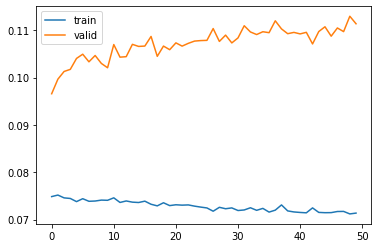

In [50]:
# Graph Results
plt.plot(results['mse'])
plt.plot(results['val_mse'])
plt.legend(("train" , "valid") , loc =0)

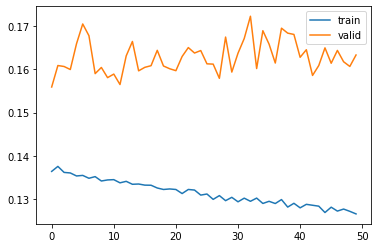

In [51]:
plt.plot(results['mae'])
plt.plot(results['val_mae'])
plt.legend(("train" , "valid") , loc =0)

**Predict**

In [52]:
y_predict = model.predict(X_test)

In [53]:
# Get the prodicted probabilities
y_predict_probability = model.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [54]:
# Predict exited if the predicted probality is greater than .5
y_predict_std5 = binarize(y_predict_probability, 0.5)

**Confusion Matrix**

In [55]:
# Create function for the confusion matrix
def draw_confusion_matrix(actual, predicted):
    confusion_mat = confusion_matrix(actual, predicted)
    sns.heatmap(confusion_mat, fmt=".1f", annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Observed')
    plt.show()

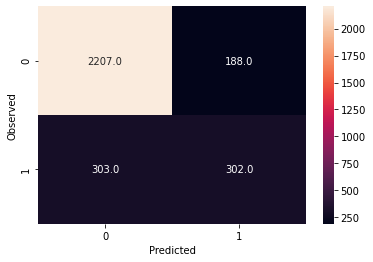

In [56]:
# Draw confusion matrix for the standard .5 threshold
draw_confusion_matrix(y_test, y_predict_std5)

(0.0, 1.0)

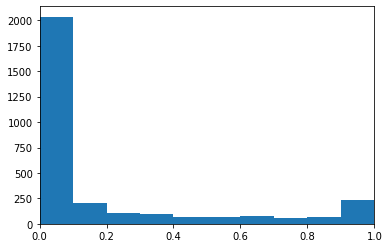

In [57]:
# Histogram of the prdicted probabilities
plt.hist(y_predict_probability, bins=10)
plt.xlim(0,1)

**Adjust Classification Threshold**

In [42]:
# Predict exited if the predicted probality is greater than .3
y_predict_cst3 = binarize(y_predict_probability, 0.3)

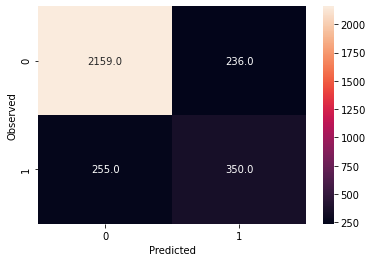

In [43]:
# Draw confusion matrix for the custom .3 threshold
draw_confusion_matrix(y_test, y_predict_cst3)

**Make Adjustments to the Model Based on Results**

In [58]:
# Build Model
model1 = Sequential()

In [59]:
# Add layers to model
model1.add(Dense(10, activation = 'relu', kernel_initializer='normal'))
model1.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(0.001)

model1.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])

In [60]:
# Fit Model
history_data1 = model1.fit(X_train, y_train, epochs=50, validation_split = 0.2, verbose = True)

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 0.2175 - mae: 0.4600 - mse: 0.2175 - val_loss: 0.1627 - val_mae: 0.3716 - val_mse: 0.1627
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1504 - mae: 0.3498 - mse: 0.1504 - val_loss: 0.1448 - val_mae: 0.3202 - val_mse: 0.1448
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1390 - mae: 0.3112 - mse: 0.1390 - val_loss: 0.1367 - val_mae: 0.2939 - val_mse: 0.1367
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1291 - mae: 0.2865 - mse: 0.1291 - val_loss: 0.1299 - val_mae: 0.2804 - val_mse: 0.1299
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1263 - mae: 0.2759 - mse: 0.1263 - val_loss: 0.1253 - val_mae: 0.2655 - val_mse: 0.1253
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1167 - mae: 0.2567 - mse: 0.1167 - val_loss: 0.1207 - val_mae: 0.2578 - val_mse: 0.1207
Epoch 7/50
175/1

In [61]:
results1  = pd.DataFrame(history_data1.history)
results1['epoch'] = history_data1.epoch
print(results1)

        loss       mae       mse  val_loss   val_mae   val_mse  epoch
0   0.193976  0.426921  0.193976  0.162653  0.371644  0.162653      0
1   0.147315  0.337028  0.147315  0.144782  0.320161  0.144782      1
2   0.135396  0.303634  0.135396  0.136664  0.293901  0.136664      2
3   0.128126  0.281741  0.128126  0.129916  0.280433  0.129916      3
4   0.122495  0.269635  0.122495  0.125286  0.265518  0.125286      4
5   0.118014  0.256830  0.118014  0.120748  0.257827  0.120748      5
6   0.114804  0.249559  0.114804  0.118326  0.250106  0.118326      6
7   0.112455  0.243108  0.112455  0.116527  0.243200  0.116527      7
8   0.110806  0.236022  0.110806  0.115066  0.240671  0.115066      8
9   0.109391  0.233575  0.109391  0.113480  0.237285  0.113480      9
10  0.108234  0.230382  0.108234  0.112587  0.232945  0.112587     10
11  0.107479  0.227229  0.107479  0.112423  0.229080  0.112423     11
12  0.106779  0.224172  0.106779  0.112220  0.226060  0.112220     12
13  0.105893  0.2210

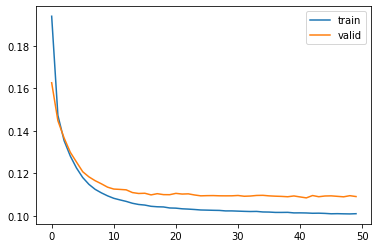

In [63]:
# Graph Results
plt.plot(results1['mse'])
plt.plot(results1['val_mse'])
plt.legend(("train" , "valid") , loc =0)

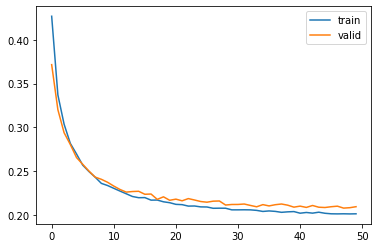

In [64]:
plt.plot(results1['mae'])
plt.plot(results1['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [65]:
y_predict1 = model1.predict(X_test)

In [66]:
# Get the prodicted probabilities
y_predict_probability1 = model1.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [67]:
y_predict_std5_1 = binarize(y_predict_probability1, 0.5)

(0.0, 1.0)

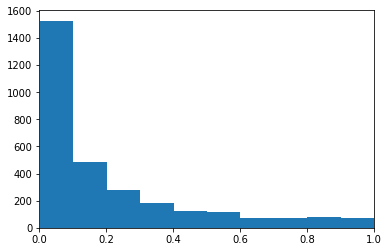

In [72]:
# Histogram of the prdicted probabilities
plt.hist(y_predict_probability1, bins=10)
plt.xlim(0,1)

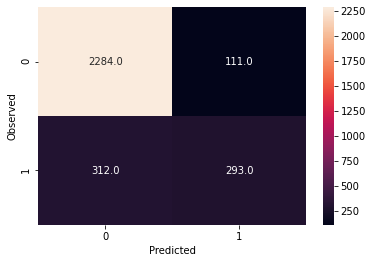

In [68]:
# Draw confusion matrix for the standard .5 threshold
draw_confusion_matrix(y_test, y_predict_std5_1)

In [70]:
y_predict_cst3_1 = binarize(y_predict_probability1, 0.3)

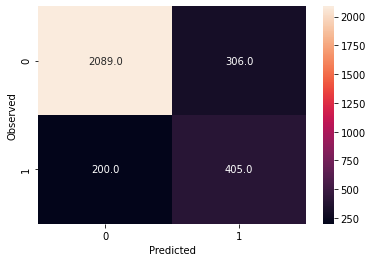

In [71]:
# Draw confusion matrix for the custom .3 threshold
draw_confusion_matrix(y_test, y_predict_cst3_1)

**Evaluation**


When going through this exercise i used the defualt .5 threshold and was getting varied results and the MSE and MAE were split apart on the graphs. It looked like it was overfitting for the data with the two hidden layers. I went ahead and changed the paramters and played with it for awhile and was able to eliminate one hidden layer and change the units to get the MAE and the MSE to look similar on the graph. There is really a lot to this and there is so much to learn and will take more practice to get better. Below is the results from the confusion matrixs.

Tuned Confusion Matix .5 threshold
TP-293
TN-2284
FP-111
FN-312

Tuned Confusion Matrix .3 threshold
TP-405
TN-2089
FP-306
FN-200

It looks like the .5 threshold seems to have less false results than the .3 threshold.